In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [415]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [416]:
leagues = ['Ligue1','SerieA', 'Bundesliga', 'Liga']
df_leagues = {}

for l in leagues:
    
    print(l)
    df_leagues[l] = pd.read_excel("drive/MyDrive/Betting/Test_MultiMetodo_"+l+"_with_odds.xlsx")    
    df_kf_out = pd.read_excel('drive/MyDrive/Betting/KellyFactor_'+l+'.xlsx')
    
    
    ###Add KF to the results DF
    import math
    import numpy as np
    
    conditions = [df_leagues[l]['Mode 1']==1, df_leagues[l]['Mode 1']==0, df_leagues[l]['Mode 1']==-1]
    output = [df_leagues[l]['B365H'],df_leagues[l]['B365D'],df_leagues[l]['B365A']]
    df_leagues[l]['Odd'] = np.select(conditions, output)
    df_leagues[l]['Odd'] = df_leagues[l]['Odd'].replace(np.nan,1.0)
    
    bin_kelly = []
    for index,row in df_leagues[l].iterrows():
        #print(row['Odd'])
        if row['Mode 1']==1:
            bin_kelly.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_h'].iloc[-1])
        if row['Mode 1']==0:
            bin_kelly.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_d'].iloc[-1])
        if row['Mode 1']==-1:
            bin_kelly.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_a'].iloc[-1])
    
    bin_kelly = [0 if math.isnan(x) else x for x in bin_kelly]
    
    df_leagues[l]['BinKelly'] = bin_kelly
    df_leagues[l]['Gain'] = df_leagues[l]['BinKelly']*df_leagues[l]['Odd']

    df_leagues[l]['YesVader']= df_leagues[l].Pushed!=df_leagues[l].Cut 
    df_leagues[l]['YesVader']=df_leagues[l]['YesVader'].astype(int)
    df_leagues[l]['WVader']=(df_leagues[l].IndovinateCut+df_leagues[l].IndovinatePushed+1)//2
    OddDNB = []
    method = ['Cannes', 'Diff', 'Pushed', 'Cut', 'Mode 1']
    for index,row in df_leagues[l].iterrows():   
        if row['Mode 1']==0:#30
            if row.YesVader==0:#15
                OddDNB.append(row.B365D)
            elif row.YesVader==1:#15
                #OddDNB.append(row.B365H*(row.B365D-1)/row.B365D)
                if row.Pushed==1:#1
                    OddDNB.append(row.B365H*(row.B365D-1)/row.B365D)
                if row.Cut == 1:
                    OddDNB.append(row.B365H*(row.B365D-1)/row.B365D)
                if row.Cut == -1:                  
                    OddDNB.append(row.B365H*(row.B365D-1)/row.B365D)
                if (row.Pushed == -1) & (row.Cut==0):
                    OddDNB.append(row.B365A*(row.B365D-1)/row.B365D)
        if row['Mode 1']==1:
            if row.YesVader==0:
                OddDNB.append(row.B365H)
            if row.YesVader==1:
                OddDNB.append(row.B365H*(row.B365D-1)/row.B365D)
        if row['Mode 1']==-1:
            if row.YesVader==0:
                OddDNB.append(row.B365A)
            if row.YesVader==1:
                OddDNB.append(row.B365A*(row.B365D-1)/row.B365D)


    OddDNB = [0 if math.isnan(x) else x for x in OddDNB]
    df_leagues[l]['OddDNB'] = OddDNB

    bin_kellyV = []
    gainV=[]
    for index,row in df_leagues[l].iterrows():
        #print(row['Odd'])
        if row['Mode 1']==0:#30
            if row.YesVader==0:#15
                bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_d'].iloc[-1])
                gainV.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_d'].iloc[-1]*row['Odd'])
            if row.YesVader==1:#15
                if row.Pushed==1:#1
                    bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_h'].iloc[-1])
                    gainV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_h'].iloc[-1]*row['OddDNB'])
                if row.Cut == 1:
                    bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_h'].iloc[-1])
                    gainV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_h'].iloc[-1]*row['OddDNB'])
                if row.Cut == -1:                  
                    bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_a'].iloc[-1])
                    gainV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_a'].iloc[-1]*row['OddDNB'])
                if (row.Pushed == -1) & (row.Cut==0):
                    bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_a'].iloc[-1])
                    gainV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_a'].iloc[-1]*row['OddDNB'])

        if row['Mode 1']==1:
            if row.YesVader==0:
                bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_h'].iloc[-1])
                gainV.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_h'].iloc[-1]*row['Odd'])
            if row.YesVader==1:
                bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_h'].iloc[-1])
                gainV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_h'].iloc[-1]*row['OddDNB'])
        if row['Mode 1']==-1:
            if row.YesVader==0:
                bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_a'].iloc[-1])
                gainV.append(df_kf_out[df_kf_out['Bins']<=row['Odd']]['kf_a'].iloc[-1]*row['Odd'])
            if row.YesVader==1:
                bin_kellyV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_a'].iloc[-1])
                gainV.append(df_kf_out[df_kf_out['Bins']<=row['OddDNB']]['kf_d'].iloc[-1]*row['OddDNB'])


    bin_kellyV = [0 if math.isnan(x) else x for x in bin_kellyV]
    gainV = [0 if math.isnan(x) else x for x in gainV]

    df_leagues[l]['BinKellyV'] = bin_kellyV
    df_leagues[l]['GainV'] = gainV#df_leagues[l]['BinKellyV']*df_leagues[l]['Odd']
    df_leagues[l].columns = ['U0', 'U1', 'Casa', 'Trasferta', 'Differenza',
       'Cannes', 'Diff', 'Cut', 'Pushed', 'Real', 'Mode1', 'Mode2',
       'WM1', 'WCut', 'WDiff', 'WPushed','WCannes', 
       'FTR', 'OddHome', 'OddDraw', 'OddAway', 'WOdd',
       'WOddM1', 'WOddM2', 'WOddDC','WOddDNB','Odd', 'BinKelly', 'Gain', 
       'YesVader','WVader', 'OddDNB', 'BinKellyV', 'GainV']

Ligue1
SerieA
Bundesliga
Liga


In [417]:
df_leagues['SerieA'].head(5)    

,U0,U1,Casa,Trasferta,Differenza,Cannes,Diff,Cut,Pushed,Real,Mode1,Mode2,WM1,WCut,WDiff,WPushed,WCannes,FTR,OddHome,OddDraw,OddAway,WOdd,WOddM1,WOddM2,WOddDC,WOddDNB,Odd,BinKelly,Gain,YesVader,WVader,OddDNB,BinKellyV,GainV
0,0,0,SPEZIA,ATALANTA,0.130338,0,0,1,0,0,0,NaN,1,0,1,1,1,0,6.50,5.25,1.40,5.25,5.25,0.0,0.0,1.000000,5.25,0.500000,2.625000,1,1,5.261905,0.000000,0.000000
1,1,1,SAMPDORIA,BOLOGNA,-0.492144,-1,-1,-1,-1,-1,-1,NaN,1,1,1,1,1,-1,2.50,3.50,2.70,2.70,2.70,0.0,0.0,1.928571,2.70,0.066667,0.180000,0,1,2.700000,0.066667,0.180000
2,2,2,CROTONE,LAZIO,-1.087688,-1,-1,-1,-1,-1,-1,NaN,1,1,1,1,1,-1,4.75,4.00,1.66,1.66,1.66,0.0,0.0,1.245000,1.66,0.250000,0.415000,0,1,1.660000,0.250000,0.415000
3,3,3,JUVENTUS,CAGLIARI,0.326975,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1.28,5.50,10.00,1.28,1.28,0.0,0.0,1.047273,1.28,0.254545,0.325818,0,1,1.280000,0.254545,0.325818
4,4,4,FIORENTINA,BENEVENTO,0.570305,1,1,1,1,-1,1,NaN,0,0,0,0,0,-1,1.50,4.75,5.50,5.50,1.50,0.0,0.0,4.342105,1.50,0.142857,0.214286,0,0,1.500000,0.142857,0.214286


In [418]:
df_giorn = {}
diff=[]
for giorn in range(0,10):
    print("#####",giorn)
    frames = []
    frames.append(df_leagues['Liga'][giorn*10:(giorn+1)*10])
    frames.append(df_leagues['SerieA'][giorn*10:(giorn+1)*10])
    frames.append(df_leagues['Ligue1'][giorn*10:(giorn+1)*10])
    frames.append(df_leagues['Bundesliga'][giorn*9:(giorn+1)*9])
    df = pd.concat(frames)
    dfV = pd.concat(frames)
    df = df[df['BinKelly']>0.0001]
    dfV = df#dfV[dfV['BinKellyV']>0.0001]

    print("Totale partite giocabili: ",len(df))
    print("Partite indovinate M1: ",df[df['WM1']==1]['WM1'].sum())
    print("Percentuale indovinata M1: ",100*df[df['WM1']==1]['WM1'].sum()/len(df))
    spesa = df[df['BinKelly']>0]['BinKelly'].sum()
    print("Spesa M1: ",spesa)
    guadagno = df[(df['BinKelly']>0) & (df['WM1']==1)]['Gain'].sum()
    print("Guadagno M1: ",guadagno)
    pctg = 100*(guadagno-spesa)/spesa
    print("Pctg M1: ",pctg)
    print('------------------------------------')
    print("Totale partite giocabili: ",len(dfV))
    print("Partite indovinate Vader: ",dfV[dfV['WVader']==1]['WVader'].sum())
    print("Percentuale indovinata Vader: ",100*dfV[dfV['WVader']==1]['WVader'].sum()/len(df))
    spesaV = dfV[dfV['BinKellyV']>0]['BinKellyV'].sum()
    print("Spesa Vader: ",spesaV)
    guadagnoV = dfV[(dfV['BinKellyV']>0) & (dfV['WVader']==1)]['GainV'].sum()
    print("Guadagno Vader: ",guadagnoV)
    pctgV = 100*(guadagnoV-spesaV)/spesaV
    print("Pctg Vader: ",pctgV)
    print('------------------------------------')
    print('Pctg M1 - Vader: ',pctg-pctgV)
    print('')
    print('')
    diff.append(pctg-pctgV)

    df_giorn[giorn] = df

##### 0
Totale partite giocabili:  27
Partite indovinate M1:  18
Percentuale indovinata M1:  66.66666666666667
Spesa M1:  4.108637988995131
Guadagno M1:  8.579061284614856
Pctg M1:  108.80548024901744
------------------------------------
Totale partite giocabili:  27
Partite indovinate Vader:  20
Percentuale indovinata Vader:  74.07407407407408
Spesa Vader:  3.65830241187384
Guadagno Vader:  5.595072622483337
Pctg Vader:  52.94177442311154
------------------------------------
Pctg M1 - Vader:  55.863705825905896


##### 1
Totale partite giocabili:  20
Partite indovinate M1:  15
Percentuale indovinata M1:  75.0
Spesa M1:  2.7388082155939295
Guadagno M1:  4.846713572142143
Pctg M1:  76.96432866479844
------------------------------------
Totale partite giocabili:  20
Partite indovinate Vader:  17
Percentuale indovinata Vader:  85.0
Spesa Vader:  3.04302033944891
Guadagno Vader:  4.330470393231166
Pctg Vader:  42.30829604035485
------------------------------------
Pctg M1 - Vader:  34.6560

Text(0.5, 0, '$\\Delta$(M1-Vader)')

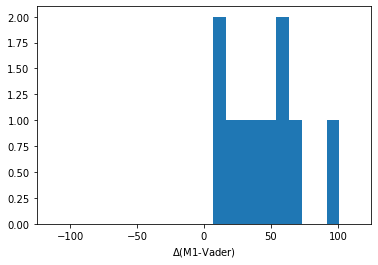

In [419]:
plt.hist(diff, bins=10)
plt.xlim(-125, 125)
plt.xlabel(r'$\Delta$(M1-Vader)')